#### Imports

In [1]:
import numpy as np
import matplotlib.pylab as plt

#### Functions for graph plotting

In [2]:
def plotting_classification_result10(Sp, Sn, w_vector, title):
    """
    Plot classification result with the current weight vector
    """
    # Initilize the scale for the plot
    scale=10 # Scale for the plot

    # Collect the coordinates for the postive and negative samples (for the easy of ploting)
    Sp_x = [] # List to store x-coordinates of positive samples
    Sp_y = [] # List to store y-coordinates of positive samples
    Sn_x = [] # List to store x-coordinates of negative samples
    Sn_y = [] # List to store y-coordinates of negative samples

    # Iterate through positive samples and append x, y coordinates to respective lists
    for i in Sp:
        Sp_x.append(i[0])
        Sp_y.append(i[1])

    # Iterate through negative samples and append x, y coordinates to respective lists
    for i in Sn:
        Sn_x.append(i[0])
        Sn_y.append(i[1])

    w0=w_vector[0]
    w1=w_vector[1]
    w2=w_vector[2]
    if w1 != 0:
      x1 = -(w0-w2*scale/2)/w1
      x2 = -(w0+w2*scale/2)/w1
      X = np.array([x1, x2])
      Y = np.array([-scale/2, scale/2])
    elif w2 != 0:
      y1 = -(w0-w1*scale/2)/w2
      y2 = -(w0+w1*scale/2)/w2
      X = np.array([-scale/2, scale/2])
      Y = np.array([y1, y2])

    fig, ax = plt.subplots(figsize=(5,5))
    blue = plt.scatter(Sn_x, Sn_y, c ='b', label='Sn : {} elements'.format(len(Sn_x)))
    red = plt.scatter(Sp_x, Sp_y, c='r', marker = "^", label='Sp : {} elements'.format(len(Sp_x)))
    line = ax.plot(X, Y, c = 'green', label='Perceptron Decision Boundary')
    plt.title(title)
    plt.legend(loc="upper right")
    plt.ylim([-scale/2,scale/2])
    plt.xlim([-scale/2,scale/2])
    plt.show()


def plotting_misclassification_over_updates(missed):
    """
    Plot number of misclassifications vs. the updates graph
    """
    n_updates = range(len(missed)+1) # Create a range of updates for x-axis of plot
    fig, ax = plt.subplots(figsize=(5,5)) # Create a plot figure
    ax.plot(n_updates, missed+[0], c = 'green') # Plot number of misclassifications vs. updates
    plt.ylabel('Number of Misclassifications') # Set y-axis label
    plt.xlabel('Number of Updates') # Set x-axis label
    plt.ylim(bottom=0) # Set lower limit of y-axis to 0
    plt.xlim(left=0) # Set lower limit of x-axis to 0
    plt.show() # Display the plot

### Training perceptron learning algorithm (PLA)

In [3]:
def activation_fn(x):
    """
    Activation function to determine the output based on input value
    """
    if x >= 0:
        y = 1 # Positive Sample Set
    else:
        y = -1 # Negative Sample Set
    return y


def misclassified(dataset, w_vector):
    """
    Function to calculate the number of misclassifications in the dataset using current weight vector
    """
    misclassifications = 0
    for sample in dataset: # The first two in samples are the x, y coordinates. The last one in sample is the label.
        y = (w_vector[0]+(sample[0]*w_vector[1])+(sample[1]*w_vector[2]))
        y = activation_fn(y)
        if y != sample[2]:
            misclassifications += 1
    return misclassifications

In [4]:
def perceptron_training(w_vec, dataset):
    """
    Function to train the perceptron
    """
    update = 0
    w_vectors = [] # List to store weight vectors at each update
    missed = [misclassified(dataset, w_vec)] # List to store number of misclassifications after each update
    Sp, Sn = [data for data in dataset if data[-1] == 1], [data for data in dataset if data[-1] == -1]
    plotting_classification_result10(Sp, Sn, w_vector, 'Initial W') # Plot the classificaiton result with initial weight vector
    # To-Do
    # Need a while loop to continue training until no misclassifications
    while missed[-1] > 0:
        # Using a for loop to iterate through each sample in the dataset
        for sample in dataset:
            # Compute perceptron output
            x1, x2, op_label = sample
            sign = w_vec[0] + (x1 * w_vec[1]) + (x2 * w_vec[2])
            cls_sign = activation_fn(sign)
            # If misclassified, 
            if cls_sign != op_label: 
                # update weights
                w_vec[0] += op_label
                w_vec[1] += op_label * x1
                w_vec[2] += op_label * x2
                # print ('Updated weights: ', w_vec)
                print('Updated weights: ', w_vec)
                # Append current weight vector to w_vectors list
                w_vectors.append(w_vec.copy()) 
                # Calculate misclassification count after weight updates
                num_miss = misclassified(dataset, w_vec)
                # print ('Number of missclassifications: ', num_miss)
                print('Number of missclassifications: ', num_miss)
                # Append current misclassification count to missed list
                missed.append(num_miss)
                # Increment update counter
                # plotting_classification_result10(Sp, Sn, w_vector, 'Update # '+str(update)
                plotting_classification_result10(Sp, Sn, w_vector, 'Update # '+str(update))
                update += 1  
    # print ('Final weights: ', w_vectors[-1])
    print('Final weights: ', w_vectors[-1])
    return w_vectors, missed

Number of Misclassifications:  1
Initial weights:  [-1, 0.3, 0]


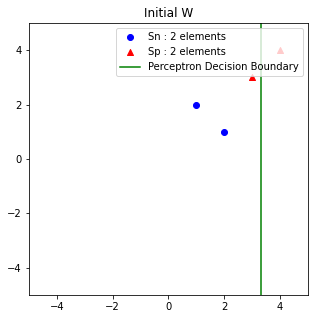

Updated weights:  [0, 3.3, 3]
Number of missclassifications:  2


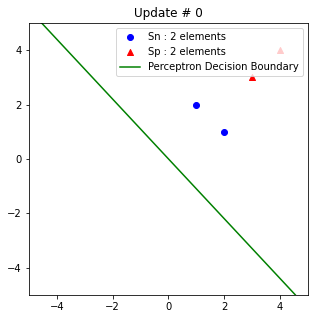

Updated weights:  [-1, 2.3, 1]
Number of missclassifications:  2


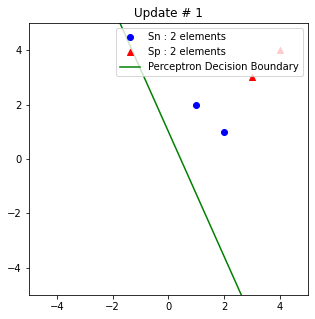

Updated weights:  [-2, 0.2999999999999998, 0]
Number of missclassifications:  2


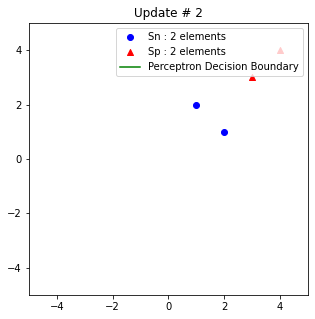

Updated weights:  [-1, 3.3, 3]
Number of missclassifications:  2


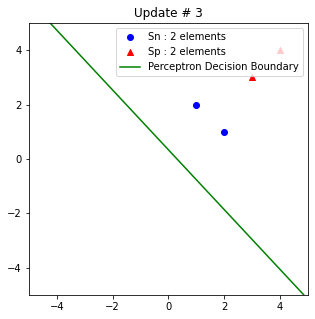

Updated weights:  [-2, 2.3, 1]
Number of missclassifications:  2


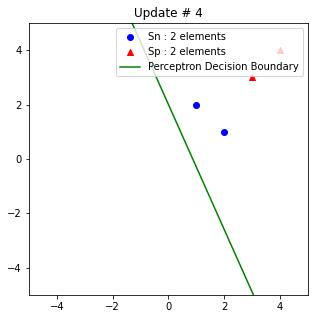

Updated weights:  [-3, 0.2999999999999998, 0]
Number of missclassifications:  2


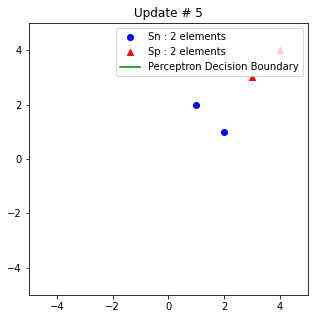

Updated weights:  [-2, 3.3, 3]
Number of missclassifications:  2


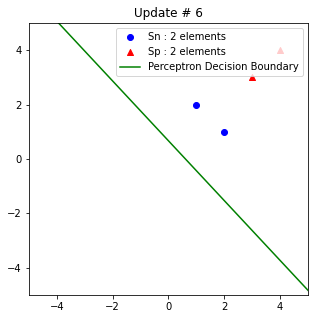

Updated weights:  [-3, 2.3, 1]
Number of missclassifications:  2


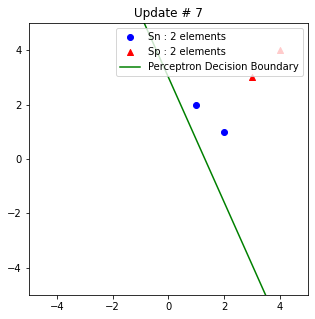

Updated weights:  [-4, 0.2999999999999998, 0]
Number of missclassifications:  2


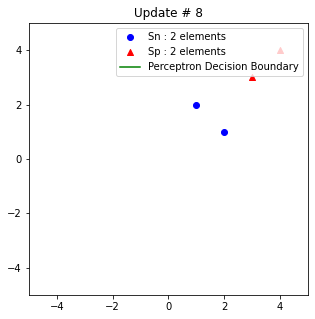

Updated weights:  [-3, 3.3, 3]
Number of missclassifications:  2


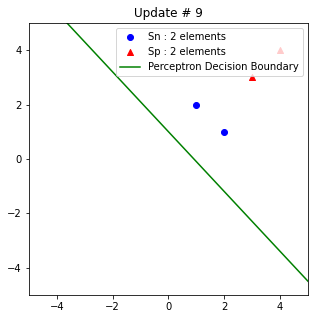

Updated weights:  [-4, 2.3, 1]
Number of missclassifications:  2


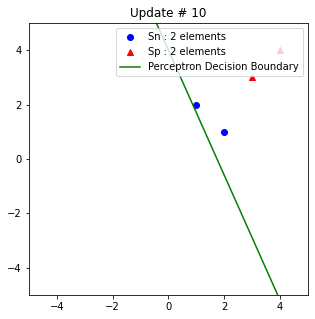

Updated weights:  [-5, 0.2999999999999998, 0]
Number of missclassifications:  2


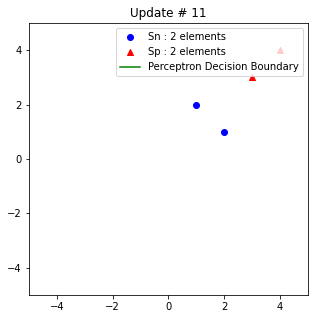

Updated weights:  [-4, 3.3, 3]
Number of missclassifications:  2


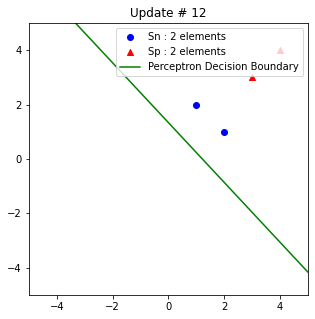

Updated weights:  [-5, 2.3, 1]
Number of missclassifications:  1


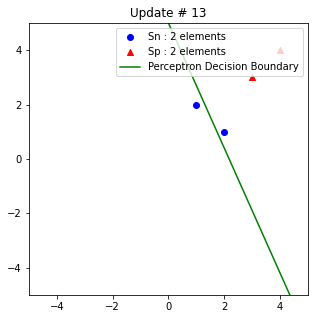

Updated weights:  [-6, 0.2999999999999998, 0]
Number of missclassifications:  2


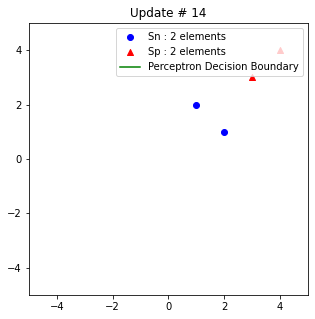

Updated weights:  [-5, 3.3, 3]
Number of missclassifications:  2


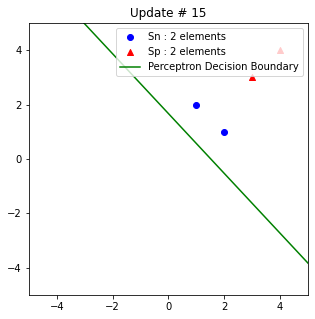

Updated weights:  [-6, 2.3, 1]
Number of missclassifications:  0


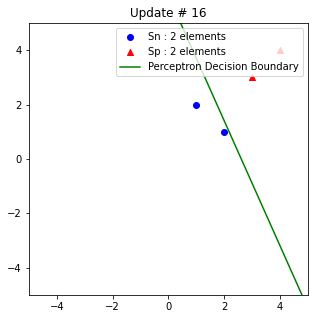

Final weights:  [-6, 2.3, 1]


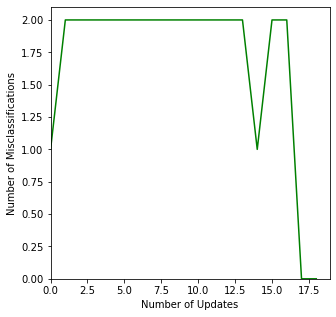

In [5]:
# Initilize the dataset
Sn = [] # List to store negative samples
Sp = [] # List to store positive samples
num_n = 0 # Counter for negative samples
num_p = 0 # Counter for positive samples

scale = 10 # Scale for the plot

# Append positive samples to Sp list with x, y coordinates and label
Sp.append([3] + [3] + [1])
num_p += 1
Sp.append([4] + [4] + [1])
num_p += 1

# Append negative samples to Sn list with x, y coordinates and label
Sn.append([1] + [2] + [-1])
num_n += 1
Sn.append([2] + [1] + [-1])
num_n += 1

# Combine positive and negative samples to create the dataset
dataset = Sn + Sp

# Collect the coordinates for the postive and negative samples (for the easy of ploting)
Sp_x = [] # List to store x-coordinates of positive samples
Sp_y = [] # List to store y-coordinates of positive samples
Sn_x = [] # List to store x-coordinates of negative samples
Sn_y = [] # List to store y-coordinates of negative samples

# Iterate through positive samples and append x, y coordinates to respective lists
for i in Sp:
    Sp_x.append(i[0])
    Sp_y.append(i[1])

# Iterate through negative samples and append x, y coordinates to respective lists
for i in Sn:
    Sn_x.append(i[0])
    Sn_y.append(i[1])

#plotting_classification_result10(Sp, Sn, original_w_vector, 'Ground Truth')

# Initilize the weight
w0_ = -1
w1_ = 0.3
w2_ = 0

#plotting_classification_result10(Sp, Sn, w_vector, 'Initial W')

w_vector = [] # List to store weights
w_vector = [w0_, w1_, w2_] # Initialize the weight vector with the given values
a = misclassified(dataset, w_vector) # Get the number of misclassifications
print ('Number of Misclassifications: ', a)

print ('Initial weights: ' , w_vector)
w_history=[] # List to store weight history during training
w_history, missed = perceptron_training(w_vector, dataset) # Call perceptron_training function to get weight history and number of misclassifications

plotting_misclassification_over_updates(missed)